In [15]:
# import torch

# def sinusoidal_objectives(X, variation_factor):
#     objective1 = torch.sum(torch.sin(X * 2 * torch.pi) + variation_factor * torch.cos(X * 2 * torch.pi), dim=1)
#     objective2 = torch.sum(torch.sin(X * 4 * torch.pi + variation_factor) - variation_factor * torch.cos(X * 4 * torch.pi), dim=1)
#     return objective1, objective2


In [16]:
# import torch

# # Define the bounds tensor (2 x d) for d=3 input dimensions
# bounds = torch.tensor([[0.0, 0.0, 0.0],  # Lower bounds for each dimension
#                        [1.0, 1.0, 1.0]]) # Upper bounds for each dimension

# def generate_single_dataset(bounds, num_samples, variation_factor):
#     # Generate random input data within the specified bounds
#     X = bounds[0] + (bounds[1] - bounds[0]) * torch.rand(num_samples, bounds.shape[1])
    
#     # Calculate the objective values using the sinusoidal_objectives function
#     objective1, objective2 = sinusoidal_objectives(X, variation_factor)
    
#     # Combine the objectives to form the output dataset (train_Y)
#     Y = torch.stack([objective1, objective2], dim=1)
    
#     return X, Y

# # Number of samples for each dataset
# num_samples_1 = 50
# num_samples_2 = 100
# num_samples_3 = 5

# # Different variation factors for each dataset
# variation_factor_1 = 0.5
# variation_factor_2 = 1.0
# variation_factor_3 = 1.5

# # Generate the three datasets
# train_X1, train_Y1 = generate_single_dataset(bounds, num_samples_1, variation_factor_1)
# train_X2, train_Y2 = generate_single_dataset(bounds, num_samples_2, variation_factor_2)
# train_X3, train_Y3 = generate_single_dataset(bounds, num_samples_3, variation_factor_3)

# # Now you have three separate datasets:
# # - train_X1, train_Y1: First dataset with `num_samples_1` points
# # - train_X2, train_Y2: Second dataset with `num_samples_2` points
# # - train_X3, train_Y3: Third dataset with `num_samples_3` points

# print("First dataset:")
# print(train_X1.shape, train_Y1.shape)

# print("Second dataset:")
# print(train_X2.shape, train_Y2.shape)

# print("Third dataset:")
# print(train_X3.shape, train_Y3.shape)


In [17]:
# import torch

# # Assume train_X1, train_X2, train_X3, train_Y1, train_Y2, train_Y3 are already defined

# def prepare_multitask_data(train_X_list, train_Y_list):
#     all_X = []
#     all_Y1 = []
#     all_Y2 = []
    
#     for i, (X, Y) in enumerate(zip(train_X_list, train_Y_list)):
#         # Add task feature as the last column in train_X
#         task_feature = torch.full((X.shape[0], 1), i, dtype=X.dtype)
#         X_augmented = torch.cat([X, task_feature], dim=1)
#         all_X.append(X_augmented)
        
#         # Split train_Y into two columns and store separately
#         all_Y1.append(Y[:, 0:1])  # Objective 1
#         all_Y2.append(Y[:, 1:2])  # Objective 2
    
#     # Concatenate all data across datasets
#     combined_X = torch.cat(all_X, dim=0)
#     combined_Y1 = torch.cat(all_Y1, dim=0)
#     combined_Y2 = torch.cat(all_Y2, dim=0)
    
#     return combined_X, combined_Y1, combined_Y2

# # Prepare data for two multi-task GP models
# train_X_list = [train_X1, train_X2, train_X3]
# train_Y_list = [train_Y1, train_Y2, train_Y3]

# # Call the function to prepare the data
# combined_X, combined_Y1, combined_Y2 = prepare_multitask_data(train_X_list, train_Y_list)

# # Now combined_X is your input tensor, and combined_Y1, combined_Y2 are the target tensors


NEW NEW

In [18]:
import torch
from torch import Tensor

def generate_car_crash_synthetic_data(outputs, variation_factor):
        '''
        Generate synthetic data for the vehicle safety design function.
        Variation factor is used to introduce noise to the data. It is a factor that is multiplied with the coefficients of the function.
        '''
        def evaluate_true(X: Tensor, coeffs) -> Tensor:
            X1, X2, X3, X4, X5 = torch.split(X, 1, -1)
            f1 = (
                coeffs[0] 
                + coeffs[1] * X1
                + coeffs[2] * X2
                + coeffs[3] * X3
                + coeffs[4] * X4
                + coeffs[5] * X5
            )
            f2 = (
                coeffs[6]
                + coeffs[7] * X1
                - coeffs[8] * X2
                + coeffs[9] * X3
                + coeffs[10] * X4
                - coeffs[11] * X1 * X4
                + coeffs[12] * X1 * X5
                + coeffs[13] * X2 * X4
                - coeffs[14] * X1.pow(2)
                - coeffs[15] * X3.pow(2)
                + coeffs[16] * X4.pow(2)
            )
            f3 = (
                coeffs[17]
                + coeffs[18] * X1
                + coeffs[19] * X2
                + coeffs[20] * X3
                - coeffs[21] * X1 * X2
                + coeffs[22] * X2 * X3
                - coeffs[23] * X2 * X4
                - coeffs[24] * X3 * X4
                - coeffs[25] * X3 * X5
                - coeffs[26] * X2.pow(2)
                + coeffs[27] * X4.pow(2)
            )
            f_X = torch.cat([f1, f2, f3], dim=-1)
            return f_X

        base_coeffs = [
            1640.2823, 2.3573285, 2.3220035, 4.5688768, 7.7213633, 4.4559504,
            6.5856, 1.15, 1.0427, 0.9738, 0.8364, 0.3695, 0.0861, 0.3628, 0.1106,
            0.3437, 0.1764, -0.0551, 0.0181, 0.1024, 0.0421, 0.0073, 0.024,
            0.0118, 0.0204, 0.008, 0.0241, 0.0109
        ]
        
        # Apply variation to coefficients
        varied_coeffs = [coeff * (1 + variation_factor) for coeff in base_coeffs]
        
        outputs = evaluate_true(outputs, varied_coeffs)
        expected_output_shape = 3

        outputs = -outputs 

        return outputs, expected_output_shape

In [19]:
import torch

# Define the bounds tensor (2 x d) for d=5 input dimensions
bounds = torch.tensor([[1.0, 1.0, 1.0, 1.0, 1.0],  # Lower bounds for each dimension
                       [3.0, 3.0, 3.0, 3.0, 3.0]]) # Upper bounds for each dimension

def generate_synthetic_dataset(bounds, num_samples, variation_factor):
    # Generate random input data within the specified bounds
    X = bounds[0] + (bounds[1] - bounds[0]) * torch.rand(num_samples, bounds.shape[1])
    
    # Generate synthetic outputs using the provided function
    outputs, expected_output_shape = generate_car_crash_synthetic_data(X, variation_factor)
    
    return X, outputs

# Example number of samples for each dataset
num_samples_1 = 50
num_samples_2 = 100
num_samples_3 = 1

# Different variation factors for each dataset
variation_factor_1 = 0.1
variation_factor_2 = 0.2
variation_factor_3 = 0.0

# Generate the three datasets
train_X1, train_Y1 = generate_synthetic_dataset(bounds, num_samples_1, variation_factor_1)
train_X2, train_Y2 = generate_synthetic_dataset(bounds, num_samples_2, variation_factor_2)
train_X3, train_Y3 = generate_synthetic_dataset(bounds, num_samples_3, variation_factor_3)

# Now you have three separate datasets:
# - train_X1, train_Y1: First dataset with `num_samples_1` points
# - train_X2, train_Y2: Second dataset with `num_samples_2` points
# - train_X3, train_Y3: Third dataset with `num_samples_3` points

print("First dataset shapes:")
print(train_X1.shape, train_Y1.shape)

print("Second dataset shapes:")
print(train_X2.shape, train_Y2.shape)

print("Third dataset shapes:")
print(train_X3.shape, train_Y3.shape)


First dataset shapes:
torch.Size([50, 5]) torch.Size([50, 3])
Second dataset shapes:
torch.Size([100, 5]) torch.Size([100, 3])
Third dataset shapes:
torch.Size([1, 5]) torch.Size([1, 3])


In [20]:
print(train_Y1)
print(train_Y2)
print(train_Y3)

tensor([[-1.8623e+03, -1.1617e+01, -1.5922e-01],
        [-1.8447e+03, -8.8363e+00, -2.2371e-01],
        [-1.8574e+03, -1.1901e+01, -1.2755e-01],
        [-1.8566e+03, -1.2201e+01, -9.8456e-02],
        [-1.8404e+03, -9.5732e+00, -1.6346e-01],
        [-1.8490e+03, -1.1651e+01, -9.2886e-02],
        [-1.8530e+03, -1.1485e+01, -9.9348e-02],
        [-1.8532e+03, -1.1167e+01, -1.4426e-01],
        [-1.8473e+03, -9.5117e+00, -1.7538e-01],
        [-1.8531e+03, -1.1727e+01, -8.4022e-02],
        [-1.8519e+03, -1.0317e+01, -1.6875e-01],
        [-1.8487e+03, -1.1069e+01, -1.1899e-01],
        [-1.8443e+03, -9.9833e+00, -1.0182e-01],
        [-1.8466e+03, -9.5695e+00, -1.1908e-01],
        [-1.8538e+03, -1.1255e+01, -9.3466e-02],
        [-1.8432e+03, -9.3707e+00, -9.4814e-02],
        [-1.8520e+03, -1.1787e+01, -1.0707e-01],
        [-1.8583e+03, -1.0796e+01, -1.8041e-01],
        [-1.8483e+03, -9.6802e+00, -9.8940e-02],
        [-1.8465e+03, -1.0532e+01, -1.0594e-01],
        [-1.8466e+03

In [21]:
import torch

def prepare_multitask_gp_data(train_X1, train_Y1, train_X2, train_Y2, train_X3, train_Y3):
    # Number of samples for each task
    n1 = train_X1.shape[0]
    n2 = train_X2.shape[0]
    n3 = train_X3.shape[0]
    
    # Add the task feature column to each train_X
    task_feature_1 = torch.zeros(n1, 1)  # Task 0 for the first objective
    task_feature_2 = torch.ones(n2, 1)   # Task 1 for the second objective
    task_feature_3 = torch.full((n3, 1), 2)  # Task 2 for the third objective
    
    # Concatenate the task feature with the input data
    train_X1 = torch.cat([train_X1, task_feature_1], dim=-1)
    train_X2 = torch.cat([train_X2, task_feature_2], dim=-1)
    train_X3 = torch.cat([train_X3, task_feature_3], dim=-1)
    
    # Concatenate all the input data
    train_X = torch.cat([train_X1, train_X2, train_X3], dim=0)
    
    # Concatenate all the output data separately for each objective
    train_Y1_obj = torch.cat([train_Y1[:, 0:1], train_Y2[:, 0:1], train_Y3[:, 0:1]], dim=0)
    train_Y2_obj = torch.cat([train_Y1[:, 1:2], train_Y2[:, 1:2], train_Y3[:, 1:2]], dim=0)
    train_Y3_obj = torch.cat([train_Y1[:, 2:3], train_Y2[:, 2:3], train_Y3[:, 2:3]], dim=0)
    
    return train_X, train_Y1_obj, train_Y2_obj, train_Y3_obj

# Example of how to use the function:
train_X, train_Y1, train_Y2, train_Y3 = prepare_multitask_gp_data(train_X1, train_Y1, train_X2, train_Y2, train_X3, train_Y3)

print("Prepared train_X shape:", train_X.shape)
print("Prepared train_Y1 shape:", train_Y1.shape)
print("Prepared train_Y2 shape:", train_Y2.shape)
print("Prepared train_Y3 shape:", train_Y3.shape)


train_X = train_X.to(dtype=torch.float64)
train_Y1 = train_Y1.to(dtype=torch.float64)
train_Y2 = train_Y2.to(dtype=torch.float64)
train_Y3 = train_Y3.to(dtype=torch.float64)


Prepared train_X shape: torch.Size([151, 6])
Prepared train_Y1 shape: torch.Size([151, 1])
Prepared train_Y2 shape: torch.Size([151, 1])
Prepared train_Y3 shape: torch.Size([151, 1])


In [22]:
print(train_X)

tensor([[1.6204, 2.3472, 2.9953, 2.9762, 1.5186, 0.0000],
        [2.6656, 2.2683, 2.5190, 1.1619, 1.0419, 0.0000],
        [2.4018, 2.4204, 1.8724, 2.8009, 1.5200, 0.0000],
        [1.0161, 1.6814, 1.6505, 2.7558, 2.7840, 0.0000],
        [2.5353, 1.6793, 1.8843, 1.0839, 1.3294, 0.0000],
        [1.1692, 1.0779, 1.9147, 2.5501, 1.5524, 0.0000],
        [2.6561, 1.3752, 1.1796, 2.2970, 2.6272, 0.0000],
        [1.5908, 2.3015, 2.1672, 2.4537, 1.4588, 0.0000],
        [1.5629, 2.3040, 2.3205, 1.6761, 1.4641, 0.0000],
        [1.0165, 2.5430, 1.0532, 2.6084, 2.4998, 0.0000],
        [2.0192, 1.8163, 2.7065, 2.2037, 1.0950, 0.0000],
        [2.6155, 1.7412, 1.3462, 2.2454, 1.4994, 0.0000],
        [1.2359, 1.0142, 2.3609, 1.6651, 1.6721, 0.0000],
        [1.5878, 2.8481, 1.5674, 1.6535, 1.8351, 0.0000],
        [2.9442, 1.0818, 1.7273, 2.0141, 2.7243, 0.0000],
        [1.3564, 1.9644, 1.0080, 1.2941, 2.9225, 0.0000],
        [1.6489, 1.9809, 1.2589, 2.5866, 2.0580, 0.0000],
        [1.871

In [23]:
from botorch.models import MultiTaskGP
from botorch.models import ModelList
from botorch.acquisition.multi_objective.logei import qLogNoisyExpectedHypervolumeImprovement

# Create a multi-task GP model


model1 = MultiTaskGP(train_X=train_X, train_Y=train_Y1, task_feature=-1, output_tasks=[2])
model2 = MultiTaskGP(train_X=train_X, train_Y=train_Y2, task_feature=-1, output_tasks=[2])
model3 = MultiTaskGP(train_X=train_X, train_Y=train_Y3, task_feature=-1, output_tasks=[2])

new_modellist = ModelList(model1, model2, model3)


In [24]:
print(new_modellist.num_outputs)

3


In [36]:
new_modellist.models[2].train_inputs[0].shape

torch.Size([151, 6])

In [11]:
from gpytorch.mlls.exact_marginal_log_likelihood import ExactMarginalLogLikelihood
from botorch.fit import fit_gpytorch_mll
mll1 = ExactMarginalLogLikelihood(new_modellist.models[0].likelihood, new_modellist.models[0])
mll2 = ExactMarginalLogLikelihood(new_modellist.models[1].likelihood, new_modellist.models[1])
mll3 = ExactMarginalLogLikelihood(new_modellist.models[2].likelihood, new_modellist.models[2])

fit_gpytorch_mll(mll1)
fit_gpytorch_mll(mll2)
fit_gpytorch_mll(mll3)

c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\linear_operator\utils\interpolation.py:71: UserWarning: torch.sparse.SparseTensor(indices, values, shape, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, shape, dtype=, device=). (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:620.)
  summing_matrix = cls(summing_matrix_indices, summing_matrix_values, size)


ExactMarginalLogLikelihood(
  (likelihood): GaussianLikelihood(
    (noise_covar): HomoskedasticNoise(
      (noise_prior): GammaPrior()
      (raw_noise_constraint): GreaterThan(1.000E-04)
    )
  )
  (model): MultiTaskGP(
    (likelihood): GaussianLikelihood(
      (noise_covar): HomoskedasticNoise(
        (noise_prior): GammaPrior()
        (raw_noise_constraint): GreaterThan(1.000E-04)
      )
    )
    (mean_module): ConstantMean()
    (covar_module): ScaleKernel(
      (base_kernel): MaternKernel(
        (lengthscale_prior): GammaPrior()
        (raw_lengthscale_constraint): Positive()
      )
      (outputscale_prior): GammaPrior()
      (raw_outputscale_constraint): Positive()
    )
    (task_covar_module): IndexKernel(
      (raw_var_constraint): Positive()
    )
  )
)

In [12]:
from botorch.optim import optimize_acqf

def perform_optimization_step(model, train_X, bounds, num_restarts=10, raw_samples=512):
    
    X_baseline_no_task = train_X[:, :-1]

    qNEHVI = qLogNoisyExpectedHypervolumeImprovement(
        model=model,
        ref_point=torch.tensor([-1864.72022, -11.81993945, -0.2903999384]),
        X_baseline=X_baseline_no_task,
        prune_baseline=True
    )

    # Optimize the acquisition function to find the next point to sample
    new_X, acq_func_value = optimize_acqf(
        acq_function=qNEHVI,
        bounds=bounds,
        q=1,
        num_restarts=num_restarts,
        raw_samples=raw_samples,
        options={"batch_limit": 5, "maxiter": 200},
    )

    print(f"Acquisition function value: {acq_func_value}")
    print(f"Next point to sample: {new_X}")    
    return new_X, acq_func_value

In [13]:
def setup_train_multitask_model(train_X, train_Y1, train_Y2, train_Y3):
    # data is here the data combined with tas feature
    model1 = MultiTaskGP(train_X=train_X, train_Y=train_Y1, task_feature=-1, output_tasks=[2])
    model2 = MultiTaskGP(train_X=train_X, train_Y=train_Y2, task_feature=-1, output_tasks=[2])
    model3 = MultiTaskGP(train_X=train_X, train_Y=train_Y3, task_feature=-1, output_tasks=[2])

    new_modellist = ModelList(model1, model2, model3)

    mll1 = ExactMarginalLogLikelihood(new_modellist.models[0].likelihood, new_modellist.models[0])
    mll2 = ExactMarginalLogLikelihood(new_modellist.models[1].likelihood, new_modellist.models[1])
    mll3 = ExactMarginalLogLikelihood(new_modellist.models[2].likelihood, new_modellist.models[2])

    fit_gpytorch_mll(mll1)
    fit_gpytorch_mll(mll2)
    fit_gpytorch_mll(mll3)

    return new_modellist

In [14]:
def optimize_vehicle_safety(model, train_X, train_Y1, train_Y2, train_Y3, bounds, num_iterations=50):
    
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}/{num_iterations}")
        new_X, acq_func_value = perform_optimization_step(model, train_X, bounds)
        
        # Evaluate new Y values
        new_Y, exp_dim = generate_car_crash_synthetic_data(new_X, 0.0)
        
        # Update training datasets:
        new_Y1, new_Y2, new_Y3 = torch.split(new_Y, 1, dim=-1)  # Split along the last dimension

        # Add the corresponding new data to each training set
        train_Y1 = torch.cat([train_Y1, new_Y1], dim=0)  # Concatenate along the first dimension
        train_Y2 = torch.cat([train_Y2, new_Y2], dim=0)  # Concatenate along the first dimension
        train_Y3 = torch.cat([train_Y3, new_Y3], dim=0)  # Concatenate along the first dimension
        
        task_feature = torch.tensor([[2.0]], dtype=torch.float64)  # Creating a tensor with value 2.0 and dtype float64
        new_X_with_task = torch.cat([new_X, task_feature], dim=-1)  # Concatenating along the last dimension

        # Concatenating new_X_with_task to train_X
        train_X = torch.cat([train_X, new_X_with_task], dim=0)  # Concatenating along the first dimension

        print(f"Training data shapes: {train_X.shape}, {train_Y1.shape}, {train_Y2.shape}, {train_Y3.shape}")

        # Setup and Refit model with updated data
        model = setup_train_multitask_model(train_X, train_Y1, train_Y2, train_Y3)
    
    return train_X, train_Y1, train_Y2, train_Y3



In [15]:
train_X, train_Y1, train_Y2, train_Y3 = optimize_vehicle_safety(new_modellist, train_X, train_Y1, train_Y2, train_Y3, bounds)

Iteration 1/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: 3.130997491998598
Next point to sample: tensor([[1., 3., 3., 1., 1.]])
Training data shapes: torch.Size([152, 6]), torch.Size([152, 1]), torch.Size([152, 1]), torch.Size([152, 1])
Iteration 2/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: 2.9875103939161987
Next point to sample: tensor([[1.0000, 3.0000, 1.0000, 1.0000, 1.9622]])
Training data shapes: torch.Size([153, 6]), torch.Size([153, 1]), torch.Size([153, 1]), torch.Size([153, 1])
Iteration 3/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: 1.4599843637017633
Next point to sample: tensor([[1.3201, 3.0000, 1.0000, 1.6333, 2.7671]])
Training data shapes: torch.Size([154, 6]), torch.Size([154, 1]), torch.Size([154, 1]), torch.Size([154, 1])
Iteration 4/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: 1.2906021757655983
Next point to sample: tensor([[1., 1., 1., 1., 1.]])
Training data shapes: torch.Size([155, 6]), torch.Size([155, 1]), torch.Size([155, 1]), torch.Size([155, 1])
Iteration 5/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: 1.4106834424360217
Next point to sample: tensor([[1., 3., 3., 1., 3.]])
Training data shapes: torch.Size([156, 6]), torch.Size([156, 1]), torch.Size([156, 1]), torch.Size([156, 1])
Iteration 6/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: 0.8976546247830681
Next point to sample: tensor([[2.1457, 3.0000, 1.0000, 2.0286, 2.5711]])
Training data shapes: torch.Size([157, 6]), torch.Size([157, 1]), torch.Size([157, 1]), torch.Size([157, 1])
Iteration 7/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: 0.5158887050818448
Next point to sample: tensor([[1.0000, 1.0000, 1.0000, 1.3667, 2.3094]])
Training data shapes: torch.Size([158, 6]), torch.Size([158, 1]), torch.Size([158, 1]), torch.Size([158, 1])
Iteration 8/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: 0.5613847860784293
Next point to sample: tensor([[1., 3., 1., 1., 1.]])
Training data shapes: torch.Size([159, 6]), torch.Size([159, 1]), torch.Size([159, 1]), torch.Size([159, 1])
Iteration 9/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: 0.09590475547497856
Next point to sample: tensor([[1.0000, 3.0000, 1.0000, 1.1486, 3.0000]])
Training data shapes: torch.Size([160, 6]), torch.Size([160, 1]), torch.Size([160, 1]), torch.Size([160, 1])
Iteration 10/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: 0.025510871100006938
Next point to sample: tensor([[1.0000, 1.0000, 1.6194, 1.9232, 3.0000]])
Training data shapes: torch.Size([161, 6]), torch.Size([161, 1]), torch.Size([161, 1]), torch.Size([161, 1])
Iteration 11/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -0.2742004181658775
Next point to sample: tensor([[1., 1., 1., 1., 3.]])
Training data shapes: torch.Size([162, 6]), torch.Size([162, 1]), torch.Size([162, 1]), torch.Size([162, 1])
Iteration 12/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -0.20934730557553483
Next point to sample: tensor([[1.0000, 1.0000, 1.0000, 1.6095, 3.0000]])
Training data shapes: torch.Size([163, 6]), torch.Size([163, 1]), torch.Size([163, 1]), torch.Size([163, 1])
Iteration 13/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -0.5058022826629829
Next point to sample: tensor([[1.0000, 3.0000, 1.0000, 1.4059, 2.6801]])
Training data shapes: torch.Size([164, 6]), torch.Size([164, 1]), torch.Size([164, 1]), torch.Size([164, 1])
Iteration 14/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -0.5540553148040059
Next point to sample: tensor([[2.9025, 3.0000, 1.0000, 2.2145, 3.0000]])
Training data shapes: torch.Size([165, 6]), torch.Size([165, 1]), torch.Size([165, 1]), torch.Size([165, 1])
Iteration 15/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -0.6734304295334441
Next point to sample: tensor([[1.9486, 3.0000, 1.0000, 2.3034, 3.0000]])
Training data shapes: torch.Size([166, 6]), torch.Size([166, 1]), torch.Size([166, 1]), torch.Size([166, 1])
Iteration 16/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -0.841562477830033
Next point to sample: tensor([[2.3664, 3.0000, 1.0000, 1.6966, 3.0000]])
Training data shapes: torch.Size([167, 6]), torch.Size([167, 1]), torch.Size([167, 1]), torch.Size([167, 1])
Iteration 17/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -1.157737001078782
Next point to sample: tensor([[2.9763, 3.0000, 1.0000, 2.4595, 2.2941]])
Training data shapes: torch.Size([168, 6]), torch.Size([168, 1]), torch.Size([168, 1]), torch.Size([168, 1])
Iteration 18/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -0.9285856581258738
Next point to sample: tensor([[1., 3., 1., 1., 3.]])
Training data shapes: torch.Size([169, 6]), torch.Size([169, 1]), torch.Size([169, 1]), torch.Size([169, 1])
Iteration 19/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -0.9773412412235674
Next point to sample: tensor([[1.0000, 1.0000, 1.0000, 1.0000, 2.0341]])
Training data shapes: torch.Size([170, 6]), torch.Size([170, 1]), torch.Size([170, 1]), torch.Size([170, 1])
Iteration 20/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -1.4603699189977575
Next point to sample: tensor([[1.5270, 3.0000, 1.0000, 1.3183, 3.0000]])
Training data shapes: torch.Size([171, 6]), torch.Size([171, 1]), torch.Size([171, 1]), torch.Size([171, 1])
Iteration 21/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.41286313947126
Next point to sample: tensor([[2.0897, 3.0000, 1.0000, 1.9986, 2.3687]])
Training data shapes: torch.Size([172, 6]), torch.Size([172, 1]), torch.Size([172, 1]), torch.Size([172, 1])
Iteration 22/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -1.4884218122234514
Next point to sample: tensor([[1.0798, 3.0000, 1.0000, 2.2423, 3.0000]])
Training data shapes: torch.Size([173, 6]), torch.Size([173, 1]), torch.Size([173, 1]), torch.Size([173, 1])
Iteration 23/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -1.6664706728667502
Next point to sample: tensor([[2.3874, 3.0000, 1.0000, 2.5596, 2.8124]])
Training data shapes: torch.Size([174, 6]), torch.Size([174, 1]), torch.Size([174, 1]), torch.Size([174, 1])
Iteration 24/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -1.693937135428679
Next point to sample: tensor([[2.2150, 3.0000, 1.0000, 2.0274, 3.0000]])
Training data shapes: torch.Size([175, 6]), torch.Size([175, 1]), torch.Size([175, 1]), torch.Size([175, 1])
Iteration 25/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.174351969626374
Next point to sample: tensor([[2.8463, 3.0000, 1.0000, 1.8214, 2.7164]])
Training data shapes: torch.Size([176, 6]), torch.Size([176, 1]), torch.Size([176, 1]), torch.Size([176, 1])
Iteration 26/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -1.2204013458945857
Next point to sample: tensor([[1.0000, 1.9972, 1.0000, 1.0000, 1.0000]])
Training data shapes: torch.Size([177, 6]), torch.Size([177, 1]), torch.Size([177, 1]), torch.Size([177, 1])
Iteration 27/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -1.693511435344182
Next point to sample: tensor([[1.0000, 3.0000, 1.0000, 1.2886, 3.0000]])
Training data shapes: torch.Size([178, 6]), torch.Size([178, 1]), torch.Size([178, 1]), torch.Size([178, 1])
Iteration 28/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.3512241657091497
Next point to sample: tensor([[2.9683, 3.0000, 1.0000, 1.9149, 3.0000]])
Training data shapes: torch.Size([179, 6]), torch.Size([179, 1]), torch.Size([179, 1]), torch.Size([179, 1])
Iteration 29/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -1.986107555058291
Next point to sample: tensor([[1.0000, 1.0000, 1.0000, 2.0966, 3.0000]])
Training data shapes: torch.Size([180, 6]), torch.Size([180, 1]), torch.Size([180, 1]), torch.Size([180, 1])
Iteration 30/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.001137652968503
Next point to sample: tensor([[3.0000, 3.0000, 1.0000, 2.5480, 3.0000]])
Training data shapes: torch.Size([181, 6]), torch.Size([181, 1]), torch.Size([181, 1]), torch.Size([181, 1])
Iteration 31/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.005775743716141
Next point to sample: tensor([[1.0000, 3.0000, 1.0000, 1.8540, 3.0000]])
Training data shapes: torch.Size([182, 6]), torch.Size([182, 1]), torch.Size([182, 1]), torch.Size([182, 1])
Iteration 32/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(
c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\optim\optimize.py:367: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[NumericalWarning('A not p.d., added jitter of 1.0e-08 to the diagonal'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.'), NumericalWarning('A not p.d., added jitter of 1.0e-08 to the diagonal')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)


Acquisition function value: -2.621076266165841
Next point to sample: tensor([[1.0000, 1.0000, 2.6023, 2.8553, 3.0000]])
Training data shapes: torch.Size([183, 6]), torch.Size([183, 1]), torch.Size([183, 1]), torch.Size([183, 1])
Iteration 33/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.774658780956722
Next point to sample: tensor([[1.0000, 1.0000, 1.0000, 1.1552, 2.1719]])
Training data shapes: torch.Size([184, 6]), torch.Size([184, 1]), torch.Size([184, 1]), torch.Size([184, 1])
Iteration 34/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.4798582234033435
Next point to sample: tensor([[1.0000, 1.0000, 2.8120, 2.4390, 3.0000]])
Training data shapes: torch.Size([185, 6]), torch.Size([185, 1]), torch.Size([185, 1]), torch.Size([185, 1])
Iteration 35/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.3600864896173146
Next point to sample: tensor([[2.0162, 1.0000, 1.0000, 1.0000, 3.0000]])
Training data shapes: torch.Size([186, 6]), torch.Size([186, 1]), torch.Size([186, 1]), torch.Size([186, 1])
Iteration 36/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.1834570156885618
Next point to sample: tensor([[1.0000, 1.0000, 1.0000, 1.2358, 3.0000]])
Training data shapes: torch.Size([187, 6]), torch.Size([187, 1]), torch.Size([187, 1]), torch.Size([187, 1])
Iteration 37/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -1.3071994698148162
Next point to sample: tensor([[1.0000, 3.0000, 3.0000, 1.0000, 2.6384]])
Training data shapes: torch.Size([188, 6]), torch.Size([188, 1]), torch.Size([188, 1]), torch.Size([188, 1])
Iteration 38/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -1.235942202294333
Next point to sample: tensor([[1.0000, 1.0000, 2.2550, 2.2630, 3.0000]])
Training data shapes: torch.Size([189, 6]), torch.Size([189, 1]), torch.Size([189, 1]), torch.Size([189, 1])
Iteration 39/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.238519388971401
Next point to sample: tensor([[1.0000, 1.0000, 1.0000, 1.7373, 1.9927]])
Training data shapes: torch.Size([190, 6]), torch.Size([190, 1]), torch.Size([190, 1]), torch.Size([190, 1])
Iteration 40/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -3.335358453580159
Next point to sample: tensor([[1.0000, 1.2906, 1.0000, 1.0000, 1.8498]])
Training data shapes: torch.Size([191, 6]), torch.Size([191, 1]), torch.Size([191, 1]), torch.Size([191, 1])
Iteration 41/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -3.054922870617716
Next point to sample: tensor([[1.0000, 3.0000, 1.0000, 2.8242, 3.0000]])
Training data shapes: torch.Size([192, 6]), torch.Size([192, 1]), torch.Size([192, 1]), torch.Size([192, 1])
Iteration 42/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -0.3421317571525835
Next point to sample: tensor([[1.0000, 3.0000, 1.9586, 1.0000, 1.0000]])
Training data shapes: torch.Size([193, 6]), torch.Size([193, 1]), torch.Size([193, 1]), torch.Size([193, 1])
Iteration 43/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.1437000823745116
Next point to sample: tensor([[1.0000, 1.0000, 3.0000, 2.7992, 3.0000]])
Training data shapes: torch.Size([194, 6]), torch.Size([194, 1]), torch.Size([194, 1]), torch.Size([194, 1])
Iteration 44/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.0782209551629127
Next point to sample: tensor([[1.0000, 3.0000, 1.0000, 1.5317, 3.0000]])
Training data shapes: torch.Size([195, 6]), torch.Size([195, 1]), torch.Size([195, 1]), torch.Size([195, 1])
Iteration 45/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.681980493888398
Next point to sample: tensor([[1.0000, 1.0000, 1.3566, 1.3811, 3.0000]])
Training data shapes: torch.Size([196, 6]), torch.Size([196, 1]), torch.Size([196, 1]), torch.Size([196, 1])
Iteration 46/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -1.917562255614055
Next point to sample: tensor([[1.0000, 3.0000, 3.0000, 1.0000, 2.0881]])
Training data shapes: torch.Size([197, 6]), torch.Size([197, 1]), torch.Size([197, 1]), torch.Size([197, 1])
Iteration 47/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.108949176029746
Next point to sample: tensor([[1.4406, 1.0000, 3.0000, 3.0000, 3.0000]])
Training data shapes: torch.Size([198, 6]), torch.Size([198, 1]), torch.Size([198, 1]), torch.Size([198, 1])
Iteration 48/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -2.9320285193416495
Next point to sample: tensor([[1.8892, 3.0000, 1.0000, 1.0000, 3.0000]])
Training data shapes: torch.Size([199, 6]), torch.Size([199, 1]), torch.Size([199, 1]), torch.Size([199, 1])
Iteration 49/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


Acquisition function value: -3.2839395437365
Next point to sample: tensor([[1.7348, 3.0000, 1.0000, 2.2652, 1.7348]])
Training data shapes: torch.Size([200, 6]), torch.Size([200, 1]), torch.Size([200, 1]), torch.Size([200, 1])
Iteration 50/50


c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(
c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\optim\optimize.py:367: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[NumericalWarning('A not p.d., added jitter of 1.0e-08 to the diagonal'), NumericalWarning('A not p.d., added jitter of 1.0e-08 to the diagonal'), OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 2 and message ABNORMAL_TERMINATION_IN_LNSRCH.'), NumericalWarning('A not p.d., added jitter of 1.0e-08 to the diagonal')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)


Acquisition function value: -3.534681759091437
Next point to sample: tensor([[1.0000, 1.0000, 1.0000, 1.4330, 3.0000]])
Training data shapes: torch.Size([201, 6]), torch.Size([201, 1]), torch.Size([201, 1]), torch.Size([201, 1])


In [16]:
print(train_Y1.shape)

torch.Size([201, 1])


In [17]:
train_Y = torch.cat([train_Y1, train_Y2, train_Y3], dim=1)

In [18]:
print(train_Y.shape)

torch.Size([201, 3])


In [19]:
train_X
print(train_X)
print(train_X.shape)

tensor([[1.6151, 2.0840, 1.5571, 1.0127, 2.8532, 0.0000],
        [2.5334, 2.3375, 1.9577, 2.1742, 1.3223, 0.0000],
        [2.3148, 2.0759, 2.3564, 2.5278, 2.2090, 0.0000],
        ...,
        [1.8892, 3.0000, 1.0000, 1.0000, 3.0000, 2.0000],
        [1.7348, 3.0000, 1.0000, 2.2652, 1.7348, 2.0000],
        [1.0000, 1.0000, 1.0000, 1.4330, 3.0000, 2.0000]], dtype=torch.float64)
torch.Size([201, 6])


In [20]:
indices = train_X[:, -1]

mask = indices == 2

filtered_train_Y = train_Y[mask]

filtered_train_X = train_X[mask]

filtered_train_X_new = X_baseline_no_task = filtered_train_X[:, :-1]


print(filtered_train_X_new)
print(filtered_train_X_new.shape)
print(filtered_train_Y)
print(filtered_train_Y.shape)

tensor([[1.9513, 1.9903, 2.2015, 2.5421, 2.9619],
        [1.0000, 3.0000, 3.0000, 1.0000, 1.0000],
        [1.0000, 3.0000, 1.0000, 1.0000, 1.9622],
        [1.3201, 3.0000, 1.0000, 1.6333, 2.7671],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 3.0000, 3.0000, 1.0000, 3.0000],
        [2.1457, 3.0000, 1.0000, 2.0286, 2.5711],
        [1.0000, 1.0000, 1.0000, 1.3667, 2.3094],
        [1.0000, 3.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 3.0000, 1.0000, 1.1486, 3.0000],
        [1.0000, 1.0000, 1.6194, 1.9232, 3.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 3.0000],
        [1.0000, 1.0000, 1.0000, 1.6095, 3.0000],
        [1.0000, 3.0000, 1.0000, 1.4059, 2.6801],
        [2.9025, 3.0000, 1.0000, 2.2145, 3.0000],
        [1.9486, 3.0000, 1.0000, 2.3034, 3.0000],
        [2.3664, 3.0000, 1.0000, 1.6966, 3.0000],
        [2.9763, 3.0000, 1.0000, 2.4595, 2.2941],
        [1.0000, 3.0000, 1.0000, 1.0000, 3.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 2.0341],


In [21]:
test_XX, exp = generate_car_crash_synthetic_data(filtered_train_X_new, 0.0)

print(test_XX)

tensor([[-1.6924e+03, -1.0578e+01, -1.0246e-01],
        [-1.6755e+03, -6.1428e+00, -2.6400e-01],
        [-1.6706e+03, -7.0276e+00, -8.4902e-02],
        [-1.6799e+03, -8.5452e+00, -6.0086e-02],
        [-1.6617e+03, -8.3046e+00, -7.0800e-02],
        [-1.6844e+03, -6.3150e+00, -2.1600e-01],
        [-1.6840e+03, -9.5432e+00, -5.2238e-02],
        [-1.6704e+03, -8.8746e+00, -5.7977e-02],
        [-1.6664e+03, -6.9448e+00, -9.2600e-02],
        [-1.6764e+03, -7.4045e+00, -7.1788e-02],
        [-1.6806e+03, -9.7644e+00, -5.6264e-02],
        [-1.6706e+03, -8.4768e+00, -5.4800e-02],
        [-1.6753e+03, -9.2631e+00, -5.2510e-02],
        [-1.6770e+03, -7.8929e+00, -6.7155e-02],
        [-1.6891e+03, -9.9960e+00, -4.4155e-02],
        [-1.6876e+03, -1.0123e+01, -4.7197e-02],
        [-1.6839e+03, -9.0908e+00, -5.3012e-02],
        [-1.6880e+03, -1.0215e+01, -4.8333e-02],
        [-1.6753e+03, -7.1170e+00, -7.6600e-02],
        [-1.6663e+03, -8.3936e+00, -6.2527e-02],
        [-1.6790e+03

In [22]:
import torch
from botorch.utils.multi_objective.box_decompositions.dominated import DominatedPartitioning
from botorch.utils.multi_objective.pareto import is_non_dominated

def calculate_final_hypervolume(train_Y_points, ref_point):
    # Ensure train_Y is a 2D tensor and convert to float64 type
    if train_Y_points.dim() == 1:
        train_Y_points = train_Y_points.unsqueeze(0)
    
    train_Y_points = train_Y_points.to(torch.float64)
    ref_point = ref_point.to(torch.float64)

    # Filter out the non-dominated points
    is_non_dominated_mask = is_non_dominated(train_Y_points)
    non_dominated_points = train_Y_points[is_non_dominated_mask]

    print(f"non_dominated points: {non_dominated_points}")
    print(ref_point)
    
    # Compute the hypervolume
    bd = DominatedPartitioning(ref_point=ref_point, Y=non_dominated_points)
    hypervolume = bd.compute_hypervolume().item()
    
    return hypervolume, non_dominated_points

# Example usage:
ref_point = torch.tensor([-1864.72022, -11.81993945, -0.2903999384], dtype=torch.float64)


final_hypervolume, non_dom_points = calculate_final_hypervolume(filtered_train_Y, ref_point)
print(f"Final Hypervolume: {final_hypervolume}")

non_dominated points: tensor([[-1.6755e+03, -6.1428e+00, -2.6400e-01],
        [-1.6706e+03, -7.0276e+00, -8.4902e-02],
        [-1.6617e+03, -8.3046e+00, -7.0800e-02],
        [-1.6844e+03, -6.3150e+00, -2.1600e-01],
        [-1.6840e+03, -9.5432e+00, -5.2238e-02],
        [-1.6704e+03, -8.8746e+00, -5.7977e-02],
        [-1.6664e+03, -6.9448e+00, -9.2600e-02],
        [-1.6764e+03, -7.4045e+00, -7.1788e-02],
        [-1.6706e+03, -8.4768e+00, -5.4800e-02],
        [-1.6770e+03, -7.8929e+00, -6.7155e-02],
        [-1.6891e+03, -9.9960e+00, -4.4155e-02],
        [-1.6753e+03, -7.1170e+00, -7.6600e-02],
        [-1.6663e+03, -8.3936e+00, -6.2527e-02],
        [-1.6790e+03, -8.0804e+00, -6.4879e-02],
        [-1.6850e+03, -9.7876e+00, -5.0881e-02],
        [-1.6861e+03, -9.6325e+00, -4.8557e-02],
        [-1.6847e+03, -9.3060e+00, -5.1279e-02],
        [-1.6640e+03, -7.6266e+00, -1.0577e-01],
        [-1.6775e+03, -7.6823e+00, -6.7696e-02],
        [-1.6870e+03, -9.5258e+00, -4.7138e-02]

In [23]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_pairplots(tensor):
    """
    Creates pair plots for the three dimensions of the input tensor.

    Args:
    tensor (torch.Tensor): A tensor of shape [n, 3]

    Returns:
    None: Displays the pair plots.
    """
    # Convert the tensor to a Pandas DataFrame for easier plotting with Seaborn
    df = pd.DataFrame(tensor.numpy(), columns=['Dim1', 'Dim2', 'Dim3'])
    
    # Create pair plots for each pair of dimensions
    sns.pairplot(df)
    plt.show()

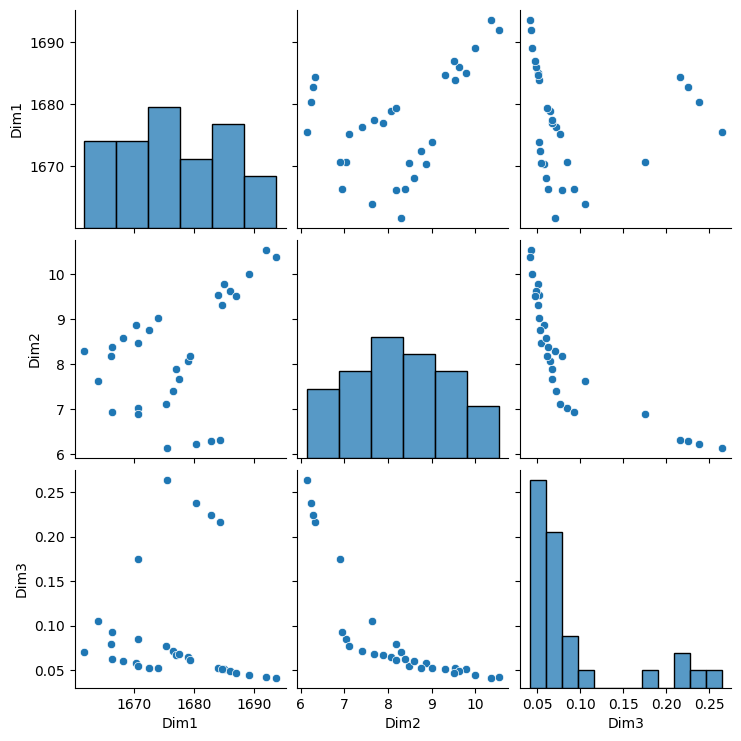

In [24]:
non_dom_points = -non_dom_points
create_pairplots(non_dom_points)

In [22]:
print(train_X)

tensor([[2.9247, 0.6232, 2.7569, 1.7187, 2.3613, 0.0000],
        [2.1386, 1.0810, 2.0433, 1.0326, 2.8096, 0.0000],
        [1.9198, 0.0873, 2.3361, 1.2222, 2.4713, 0.0000],
        [2.5457, 1.6820, 0.3760, 0.3295, 2.3937, 0.0000],
        [1.0364, 2.2293, 1.4836, 0.9493, 1.9669, 0.0000],
        [1.7101, 0.6485, 2.4573, 2.2737, 0.0276, 0.0000],
        [1.1502, 2.9806, 1.9923, 1.0980, 1.0318, 0.0000],
        [2.2174, 2.8534, 2.4883, 1.2107, 0.9697, 0.0000],
        [0.4827, 2.4407, 1.6537, 0.1218, 2.8277, 0.0000],
        [2.3530, 1.6258, 1.7168, 2.1694, 0.9787, 0.0000],
        [2.4652, 0.2077, 2.8203, 1.6549, 2.4798, 0.0000],
        [2.6177, 1.0288, 2.8193, 0.5612, 1.6197, 0.0000],
        [2.4013, 0.7797, 0.4519, 2.5350, 2.0968, 0.0000],
        [2.7104, 2.7646, 2.3751, 0.0652, 0.5833, 0.0000],
        [2.5060, 0.5138, 2.4884, 2.6837, 1.8664, 0.0000],
        [1.3624, 0.3832, 1.2960, 1.3035, 1.6263, 0.0000],
        [1.7419, 2.5283, 0.7952, 1.6990, 2.6775, 0.0000],
        [1.243

In [21]:
print(train_Y)

tensor([[-1.8535e+03, -1.0461e+01, -7.3818e-02],
        [-1.8454e+03, -1.0037e+01, -1.0756e-01],
        [-1.8437e+03, -1.0516e+01, -1.1253e-03],
        [-1.8316e+03, -8.8778e+00, -8.7670e-02],
        [-1.8379e+03, -8.3106e+00, -1.4290e-01],
        [-1.8422e+03, -1.0765e+01, -9.9174e-02],
        [-1.8393e+03, -7.9024e+00, -1.8882e-01],
        [-1.8449e+03, -8.3922e+00, -2.2488e-01],
        [-1.8350e+03, -6.1035e+00, -1.9033e-01],
        [-1.8464e+03, -1.0867e+01, -1.3405e-01],
        [-1.8516e+03, -1.0511e+01, -1.4777e-02],
        [-1.8406e+03, -9.1690e+00, -1.8544e-01],
        [-1.8466e+03, -1.1464e+01, -9.1454e-02],
        [-1.8337e+03, -7.2303e+00, -3.0736e-01],
        [-1.8566e+03, -1.1512e+01, -5.6539e-02],
        [-1.8344e+03, -1.0272e+01, -3.2158e-02],
        [-1.8468e+03, -9.8677e+00, -7.3741e-02],
        [-1.8333e+03, -8.2333e+00, -1.5087e-01],
        [-1.8438e+03, -1.0496e+01, -8.0070e-02],
        [-1.8428e+03, -1.0705e+01, -9.2809e-02],
        [-1.8464e+03

In [55]:
# Create the qNEHVI acquisition function using the modified X_baseline
qNEHVI = qLogNoisyExpectedHypervolumeImprovement(
    model=new_modellist,
    X_baseline=X_baseline_no_task,
    ref_point=torch.tensor([-1864.72022, -11.81993945, -0.2903999384]),
    prune_baseline=True
)

c:\Users\Moritz\anaconda3\envs\TL_GP\lib\site-packages\botorch\acquisition\cached_cholesky.py:89: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  warnings.warn(


In [56]:
from botorch.optim import optimize_acqf

new_X, acq_func_value = optimize_acqf(
        acq_function=qNEHVI,
        bounds=bounds,
        q=1,
        num_restarts=10,
        raw_samples=512,
    )

In [68]:
new_Y , exp_ = generate_car_crash_synthetic_data(new_X, 0.0)

In [70]:
print(new_Y.shape)

torch.Size([1, 3])


In [57]:
print(new_X)

tensor([[2.0428, 2.7625, 3.0000, 0.0000, 0.6162]])


In [60]:
print(train_X)

tensor([[2.1095e+00, 4.7438e-01, 1.1849e+00, 1.1346e+00, 9.2231e-01, 0.0000e+00],
        [1.9544e+00, 8.8923e-01, 2.9239e+00, 1.2207e+00, 2.3603e+00, 0.0000e+00],
        [1.1821e+00, 1.4144e+00, 1.9060e+00, 1.4549e+00, 2.1148e+00, 0.0000e+00],
        [2.4778e+00, 1.6518e+00, 2.9498e-01, 2.0014e+00, 1.8411e+00, 0.0000e+00],
        [2.7775e+00, 1.4986e+00, 1.2764e+00, 2.2276e+00, 1.9990e+00, 0.0000e+00],
        [6.7216e-01, 2.0316e+00, 7.6085e-01, 5.1144e-01, 1.7983e+00, 0.0000e+00],
        [2.9586e-02, 2.6612e-01, 1.1861e+00, 7.8961e-01, 2.5484e+00, 0.0000e+00],
        [7.9050e-01, 1.7441e+00, 2.8862e+00, 2.0452e+00, 3.4542e-01, 0.0000e+00],
        [2.9570e+00, 4.5597e-01, 2.9142e+00, 1.1441e+00, 2.7106e+00, 0.0000e+00],
        [2.1601e-01, 2.2784e+00, 2.1023e+00, 2.1226e+00, 1.6035e+00, 0.0000e+00],
        [1.4925e+00, 2.3871e+00, 5.6532e-01, 1.6936e+00, 2.6634e+00, 0.0000e+00],
        [2.9840e+00, 1.4505e+00, 1.1742e+00, 2.2280e+00, 6.9904e-01, 0.0000e+00],
        [2.2886e

In [59]:
print(train_X.shape)

torch.Size([151, 6])


In [63]:
print(new_X.shape)

torch.Size([1, 5])


In [64]:
task_feature = torch.tensor([[2.0]], dtype=torch.float64)  # Creating a tensor with value 2.0 and dtype float64
new_X_with_task = torch.cat([new_X, task_feature], dim=-1)  # Concatenating along the last dimension

# Concatenating new_X_with_task to train_X
train_X = torch.cat([train_X, new_X_with_task], dim=0)  # Concatenating along the first dimension

# Verify the shapes
print("Updated train_X shape:", train_X.shape)

Updated train_X shape: torch.Size([152, 6])


In [65]:
print(train_X)

tensor([[2.1095e+00, 4.7438e-01, 1.1849e+00, 1.1346e+00, 9.2231e-01, 0.0000e+00],
        [1.9544e+00, 8.8923e-01, 2.9239e+00, 1.2207e+00, 2.3603e+00, 0.0000e+00],
        [1.1821e+00, 1.4144e+00, 1.9060e+00, 1.4549e+00, 2.1148e+00, 0.0000e+00],
        [2.4778e+00, 1.6518e+00, 2.9498e-01, 2.0014e+00, 1.8411e+00, 0.0000e+00],
        [2.7775e+00, 1.4986e+00, 1.2764e+00, 2.2276e+00, 1.9990e+00, 0.0000e+00],
        [6.7216e-01, 2.0316e+00, 7.6085e-01, 5.1144e-01, 1.7983e+00, 0.0000e+00],
        [2.9586e-02, 2.6612e-01, 1.1861e+00, 7.8961e-01, 2.5484e+00, 0.0000e+00],
        [7.9050e-01, 1.7441e+00, 2.8862e+00, 2.0452e+00, 3.4542e-01, 0.0000e+00],
        [2.9570e+00, 4.5597e-01, 2.9142e+00, 1.1441e+00, 2.7106e+00, 0.0000e+00],
        [2.1601e-01, 2.2784e+00, 2.1023e+00, 2.1226e+00, 1.6035e+00, 0.0000e+00],
        [1.4925e+00, 2.3871e+00, 5.6532e-01, 1.6936e+00, 2.6634e+00, 0.0000e+00],
        [2.9840e+00, 1.4505e+00, 1.1742e+00, 2.2280e+00, 6.9904e-01, 0.0000e+00],
        [2.2886e